In [1]:
# import os
# import warnings
# import argparse
# import datetime
# import pathlib
# import sys

# import torch
# import torch.nn as nn
# from torch.utils.data import DataLoader
# from torch.utils.tensorboard import SummaryWriter

# from tqdm import tqdm
# import pickle

# from test import test
# from utils.evaluate_uncertainty import evaluate_uncertainty
# from core.config import create_config, save_config
# # from core.dataset import COCODataset
# from core.dataset_hotswapped import COCODataset
# from core.model import Model
# from core.metrics import AccuracyLogger
# import pickle
# from SupContrast.losses import SupConLoss
# import torch.nn.functional as F

In [2]:
import argparse
import datetime
import pathlib
import json
import yaml
import os
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from tqdm import tqdm
from ml_collections import ConfigDict

from core.dataset_hotswapped_crop_save import COCODataset
from core.config import save_config
from core.model import Model
from core.metrics import AccuracyLogger, IndividualScoreLogger
import torchvision
import pickle
import timm
import random

In [21]:
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
annotations_file  = '../openrooms/annotation_files/train_scannet_real_50_v2.json'

In [4]:
imagedir = '../'

In [5]:
material_fols = ["random"]

In [6]:
testset = COCODataset(annotations_file, imagedir, (224,224), material_fols, normalize_means=[0.485, 0.456, 0.406], normalize_stds=[0.229, 0.224, 0.225])
dataloader = DataLoader(testset, batch_size=200, num_workers=1, shuffle=False, drop_last=False)

Hotswapped material loader being used.
{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12}
-------------------------------
Annotation Counts
-------------------------------
table                       887
sofa                        246
chair                       996
window                      290
monitor                     122
trash_bin                   164
bed                         177
lamp                         59
file_cabinet                 58
bathtub                     131
bookshelf                   140
flowerpot                     5
Total                      3275
-------------------------------



In [9]:
with torch.no_grad():
    for data in dataloader:
        impath_1, impath_2, bbox, label, annot_idx = data
        break

In [26]:
%matplotlib inline

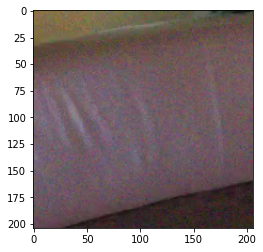

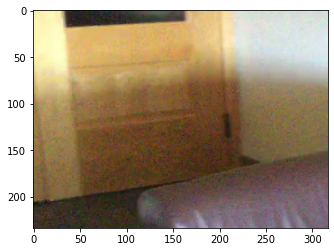

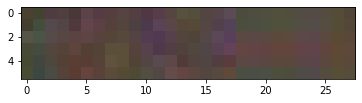

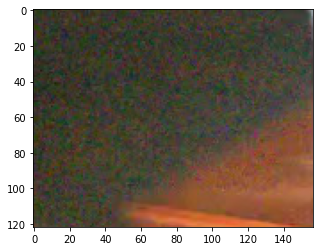

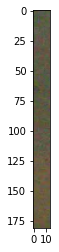

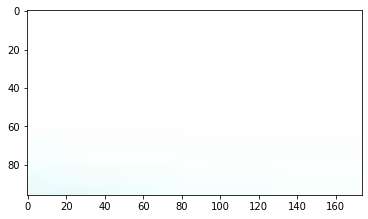

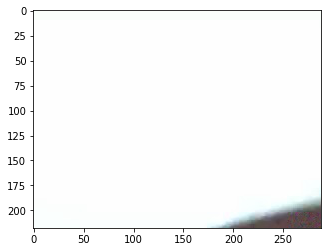

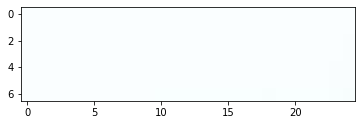

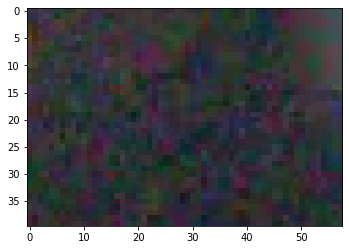

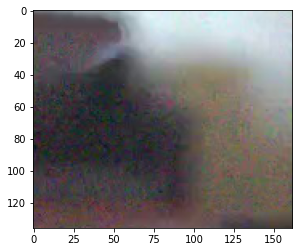

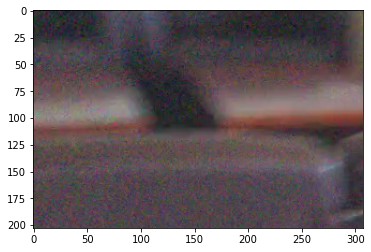

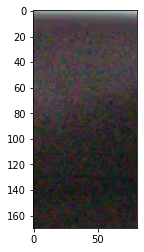

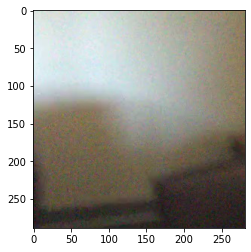

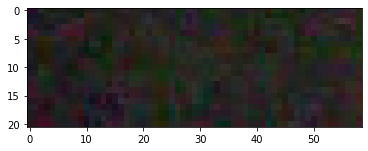

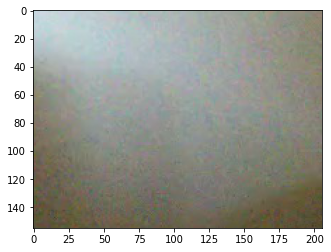

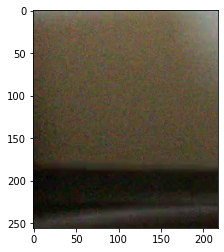

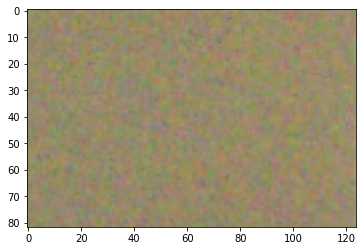

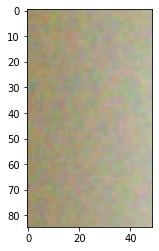

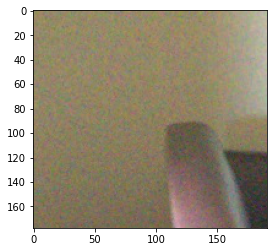

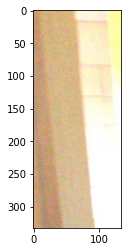

In [27]:
for i in range(len(impath_1[:20])):
    impath = impath_1[i]
    image = Image.open(impath)
    image = image.convert("RGB")
    xmin, ymin, w, h = bbox[0][i], bbox[1][i], bbox[2][i], bbox[3][i]
    target_image = image.crop((int(xmin), int(ymin), int(xmin + w), int(ymin + h)))
    plt.imshow(target_image)
    plt.show()
#     target_image.save(new_save_path)